Read data

In [23]:
reps = 20

with open("../misc_files/species_small.txt", "r") as fh:
    branches = [line.strip() for line in fh]

In [41]:
l = []

for b in branches:
    for r in range(reps):
        df = pd.read_csv("../sub_types/subs/{}.{}.subtypes.txt".format(b, r),
                         sep="\t",header=None)
        fdf = pd.DataFrame([c.split() for c in df[0]])
        fdf.columns = ["n_subs", "kind"]
        fdf.n_subs = list(map(int, fdf.n_subs))
        total_subs = fdf.n_subs.sum()
        fdf["branch"] = b
        fdf["rep"] = r
        fdf["frac_subs"] = fdf.n_subs/total_subs
        l.append(fdf)

s = pd.concat(l)

/Users/marc/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


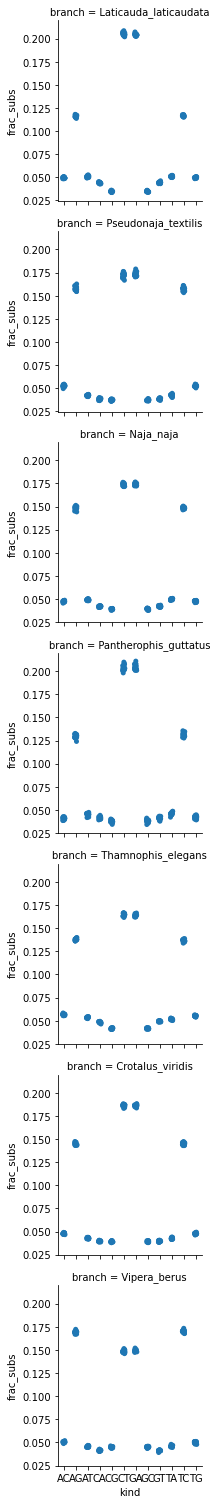

In [42]:
g = sns.FacetGrid(data=s, row="branch")
g.map(sns.stripplot, "kind", "frac_subs")